<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/yazdipour/SRU-deeplearning-workshop/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد. 
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


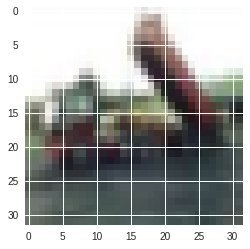

In [3]:
plt.imshow(x_train[2])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [5]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [7]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

 # <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    
 
</ul>
</div>


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
__________

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [0]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer= opt_rms,
              metrics=['accuracy'])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit
  روی مدل آن را آموزش بدهید.
  برای سادگی
  25
  ایپاک با سایز بچ 
  64 بزنید. 
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [11]:
model.fit(x_train, y_train, epochs= 20, batch_size= 64, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 243us/step - loss: 1.8011 - acc: 0.3446 - val_loss: 1.4149 - val_acc: 0.4861
Epoch 2/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.4549 - acc: 0.4846 - val_loss: 1.3923 - val_acc: 0.5055
Epoch 3/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.2976 - acc: 0.5447 - val_loss: 1.5161 - val_acc: 0.4743
Epoch 4/20
50000/50000 [==============================] - 8s 160us/step - loss: 1.1893 - acc: 0.5865 - val_loss: 1.1211 - val_acc: 0.6039
Epoch 5/20
50000/50000 [==============================] - 8s 161us/step - loss: 1.1147 - acc: 0.6153 - val_loss: 1.2317 - val_acc: 0.5684
Epoch 6/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.0624 - acc: 0.6344 - val_loss: 1.0466 - val_acc: 0.6351
Epoch 7/20
50000/50000 [==============================] - 8s 160us/step -

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>

In [14]:
#https://github.com/katnoria/cifar10-native-vs-colab
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(keras.layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='relu'))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [0]:
model2.compile(loss='categorical_crossentropy',
              optimizer= opt_rms,
              metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs= 20, batch_size= 64, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 230us/step - loss: 1.5598 - acc: 0.4551 - val_loss: 1.4802 - val_acc: 0.5034
Epoch 2/20
50000/50000 [==============================] - 11s 217us/step - loss: 1.1490 - acc: 0.6042 - val_loss: 1.4017 - val_acc: 0.5344
Epoch 3/20
50000/50000 [==============================] - 11s 214us/step - loss: 0.9981 - acc: 0.6594 - val_loss: 1.4828 - val_acc: 0.5287
Epoch 4/20
50000/50000 [==============================] - 11s 212us/step - loss: 0.9006 - acc: 0.6953 - val_loss: 1.3524 - val_acc: 0.5605
Epoch 5/20
50000/50000 [==============================] - 11s 213us/step - loss: 0.8367 - acc: 0.7177 - val_loss: 0.9885 - val_acc: 0.6805
Epoch 6/20
50000/50000 [==============================] - 11s 217us/step - loss: 0.7902 - acc: 0.7337 - val_loss: 1.1431 - val_acc: 0.6298
Epoch 7/20
50000/50000 [==============================] - 11s 215us/step - loss: 0.7429 - acc: 0.7502 - val_loss: 1.